<a href="https://colab.research.google.com/github/SurekhaBerlin/Titanic-Machine-Learning/blob/main/TitanicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
test_df = pd.read_csv("test.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.shape

(891, 12)

In [8]:

train_df.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [9]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So it means there are around 177 null values in Age and around 687 null values in cabin


## Handling Missing Values

In [11]:
train_df = train_df.drop(columns = "Cabin",axis = 1)

Drop the cabin column, since the percentage of missing values of cabin is high.

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Replaceing the missing values of age column with the mean value

In [13]:
train_df["Age"].fillna(train_df["Age"].mean(),inplace = True)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
#finding the mode value of embarked column
print(train_df.Embarked.mode()[0])

S


In [16]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0],inplace = True)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## DATA ANALYSIS

Getting some statistical data about the titanic data


In [19]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


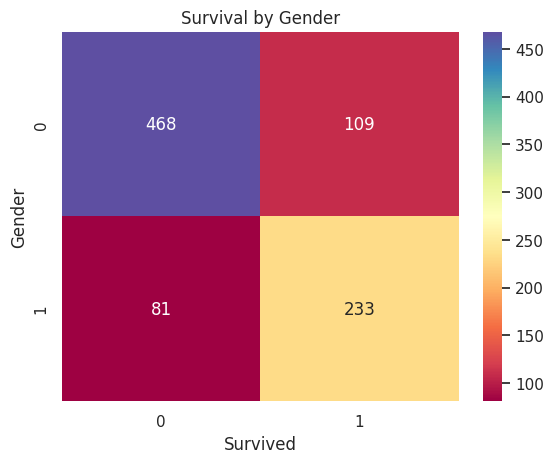

In [91]:
cross_tab = pd.crosstab(train_df['Sex'], train_df['Survived'])

# Using seaborn heatmap to plot the crosstab
sns.heatmap(cross_tab, cmap="Spectral", annot=True, fmt='d')
plt.title('Survival by Gender')
plt.xlabel('Survived')
plt.ylabel('Gender')
plt.show()

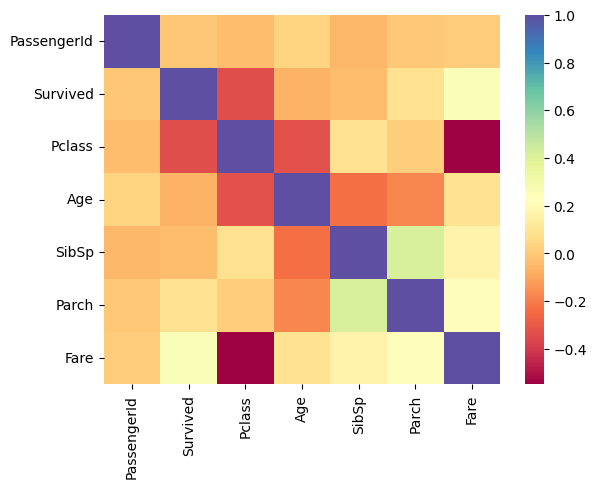

In [21]:
sns.heatmap(numeric_df.corr(), cmap="Spectral")
plt.show()


In [22]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins = True).style.background_gradient(cmap = "Spectral")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [23]:
#finding the number of people survived nd not survived
train_df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## DATA VISUALIZATION

## Univariate Analysis

In [24]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

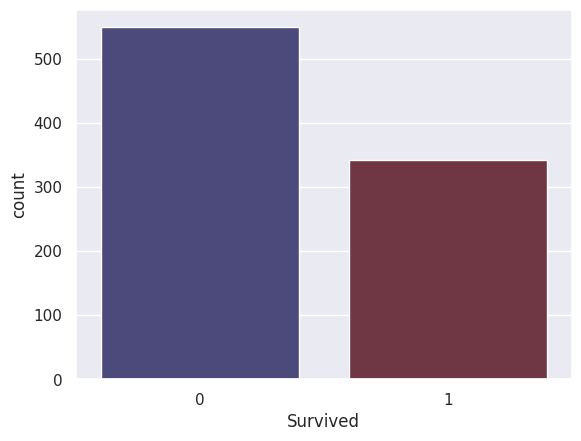

In [25]:
#making a count plot for Survived column

sns.countplot(x="Survived", data=train_df, palette="icefire")

<Axes: xlabel='Sex', ylabel='count'>

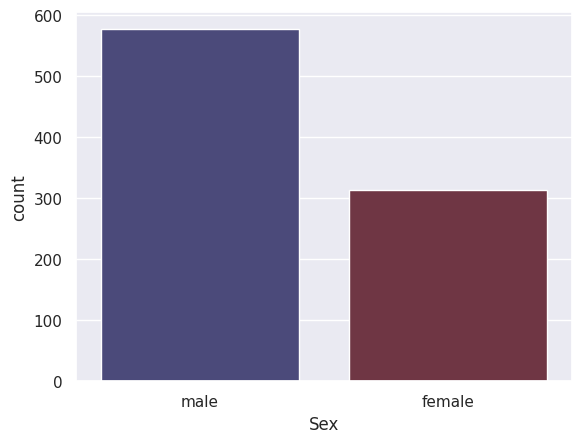

In [26]:
sns.countplot(x="Sex", data=train_df, palette="icefire")

In [27]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

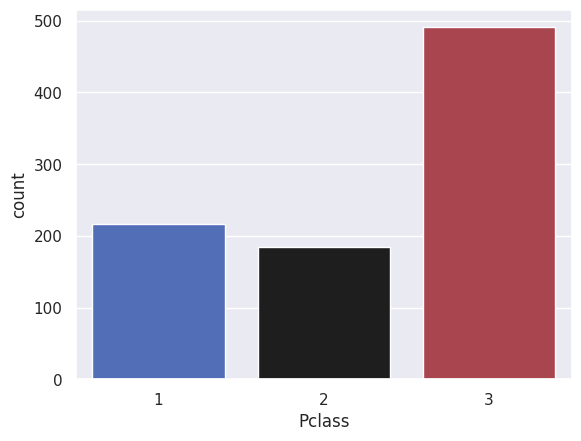

In [28]:
sns.countplot(x="Pclass", data=train_df, palette="icefire")

## Bivariate Analysis

<Axes: xlabel='Sex', ylabel='count'>

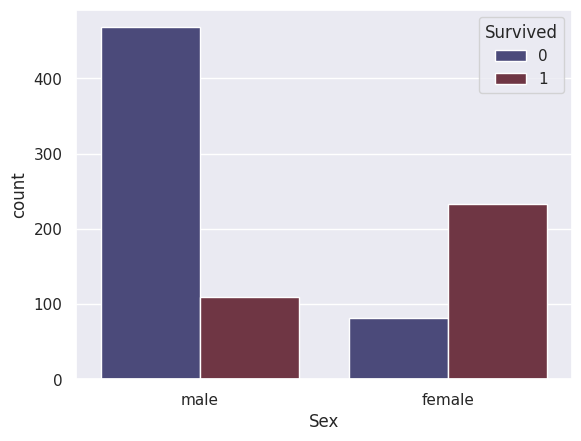

In [29]:
# No of survivors based on genderwise distribution
sns.countplot(x="Sex",hue = 'Survived', data=train_df, palette="icefire")

<Axes: xlabel='Pclass', ylabel='count'>

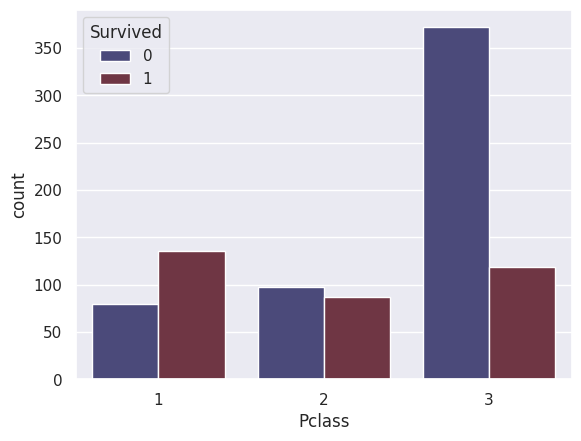

In [30]:
sns.countplot(x="Pclass",hue = 'Survived', data=train_df, palette="icefire")

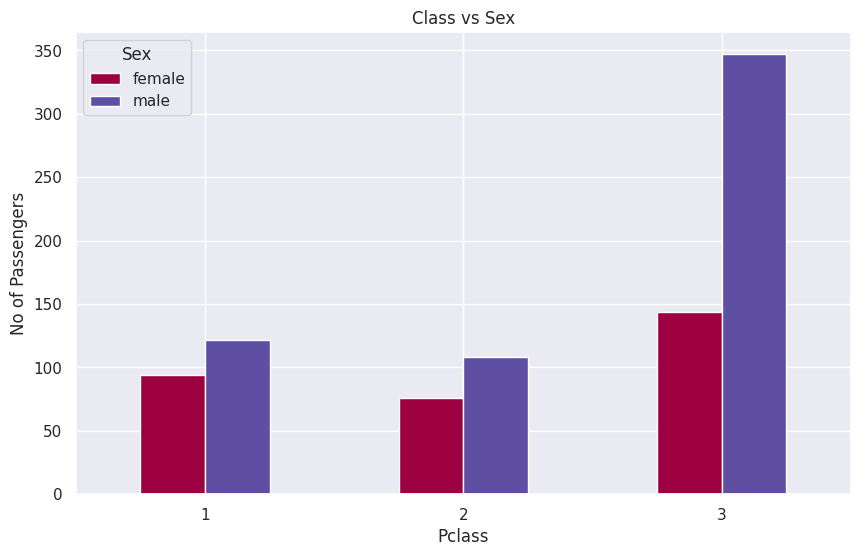

In [31]:
pd.crosstab(train_df.Pclass,train_df.Sex).plot(kind="bar",
                                   figsize=(10,6),cmap ="Spectral");
plt.title("Class vs Sex");
plt.xticks(rotation=0)
plt.ylabel("No of Passengers");

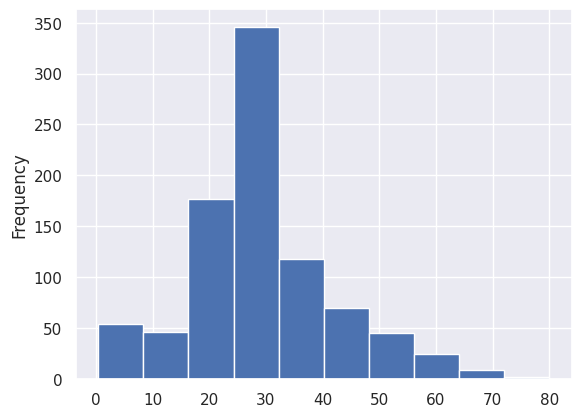

In [32]:
train_df.Age.plot.hist();

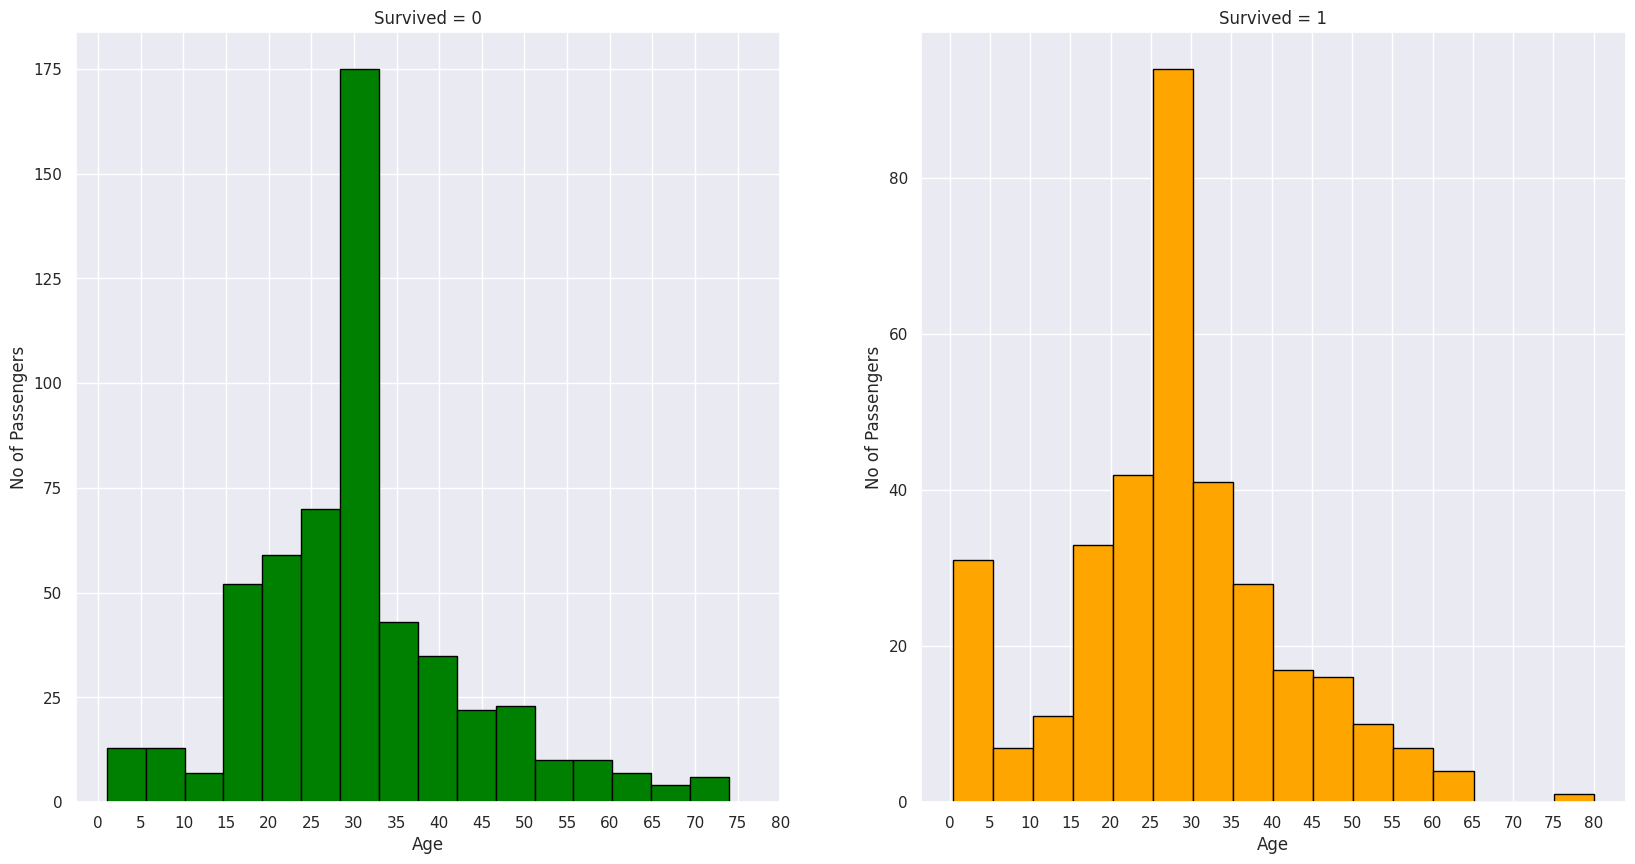

In [33]:

f,ax=plt.subplots(1,2,figsize=(20,10))

train_df[train_df['Survived']==0].Age.plot.hist(ax=ax[0],bins=16,edgecolor='black',color='green')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("No of Passengers")

train_df[train_df['Survived']==1].Age.plot.hist(ax=ax[1],color='orange',bins=16,edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
ax[1].set_xlabel("Age")
ax[1].set_ylabel("No of Passengers")

plt.show();

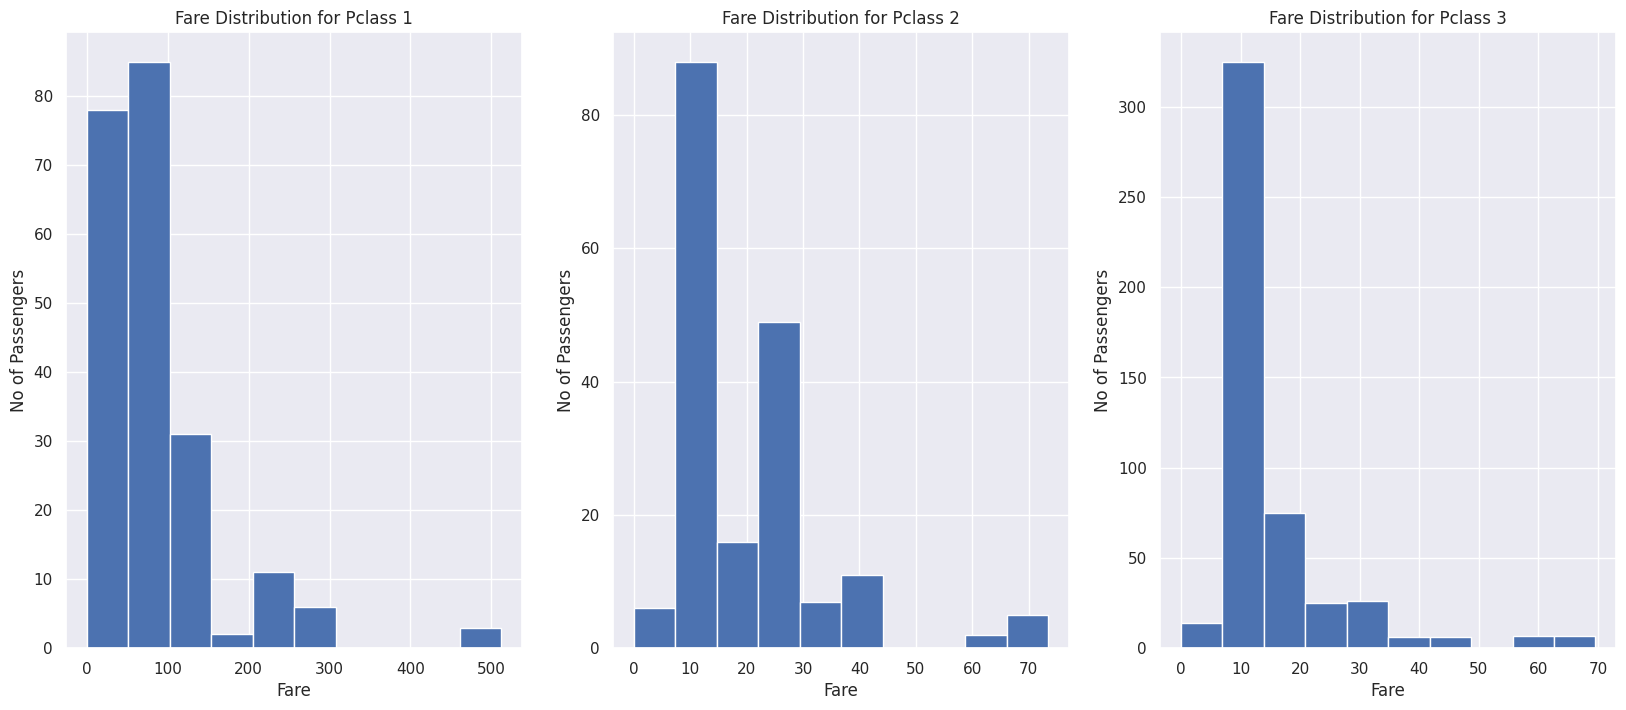

In [34]:
fig, ax = plt.subplots(1,3,figsize=(20,8))

train_df[train_df.Pclass==1].Fare.plot.hist(ax=ax[0])
ax[0].set_title('Fare Distribution for Pclass 1')
ax[0].set_xlabel('Fare')
ax[0].set_ylabel('No of Passengers');

train_df[train_df.Pclass==2].Fare.plot.hist(ax=ax[1])
ax[1].set_title('Fare Distribution for Pclass 2')
ax[1].set_xlabel('Fare')
ax[1].set_ylabel('No of Passengers');

train_df[train_df.Pclass==3].Fare.plot.hist(ax=ax[2])
ax[2].set_title('Fare Distribution for Pclass 3')
ax[2].set_xlabel('Fare')
ax[2].set_ylabel('No of Passengers');

In [35]:
train_df.groupby(['Pclass'],as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [36]:
train_df.groupby(['Sex'],as_index = False)['Survived'].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [37]:
train_df.groupby(['SibSp'],as_index = False)['Survived'].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [38]:
train_df.groupby(['Parch'],as_index = False)['Survived'].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [39]:
train_df['Family_Size'] = train_df['Parch']+train_df['SibSp'] +1
test_df['Family_Size'] = test_df['Parch']+test_df['SibSp'] +1

In [40]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [41]:
train_df.groupby(['Family_Size'],as_index = False)['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [42]:
family_map = {1 : 'Alone' ,2 : 'Small',3 : 'Small',4 : 'Small',5 : 'Medium' , 6 : 'Medium', 7: 'Large',8: 'Large', 11: 'Large',  }

In [43]:
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map (family_map)
test_df['Family_Size_Grouped'] = test_df['Family_Size'].map (family_map)

In [44]:
train_df.groupby(['Family_Size_Grouped'],as_index = False)['Survived'].mean()

,Family_Size_Grouped,Survived
0,Alone,0.303538
1,Large,0.160000
2,Medium,0.162162
3,Small,0.578767


In [45]:
train_df.groupby(['Embarked'],as_index = False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


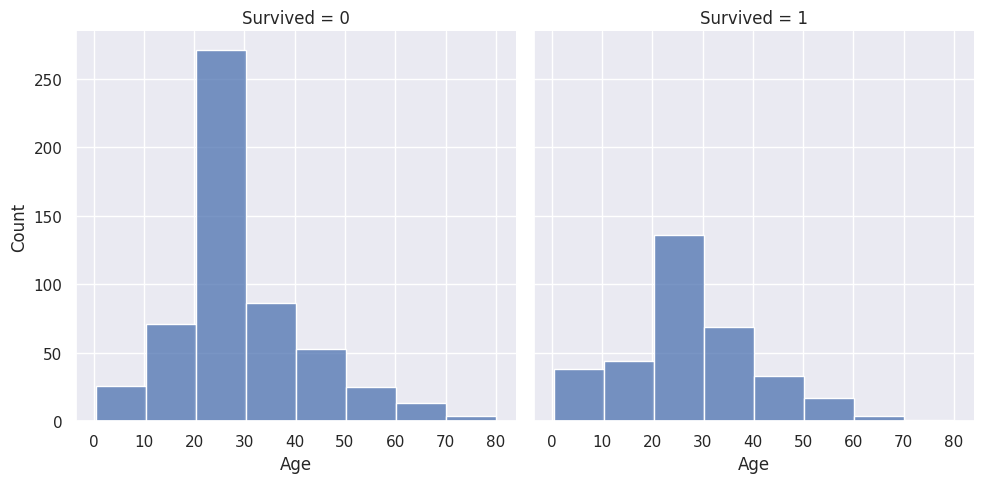

In [46]:
sns.displot(train_df, x ='Age', col ='Survived',binwidth = 10,height = 5)

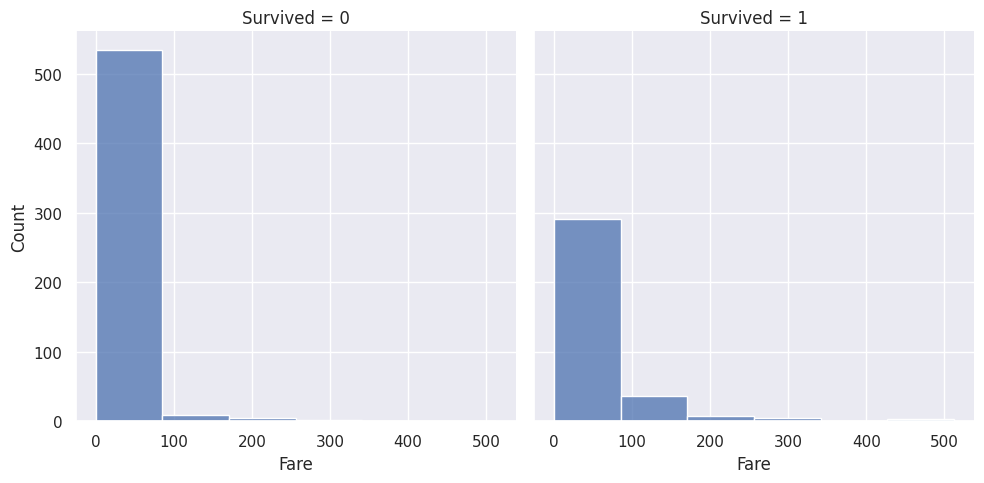

In [47]:
sns.displot(train_df, x ='Fare', col ='Survived',binwidth = 80,height = 5)

In [48]:
train_df ['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [49]:
train_df['Title'] = train_df['Name'].str.split(pat =',',expand = True)[1].str.split(pat ='.',expand = True)[0].apply(lambda x: x.strip())

In [50]:
test_df['Title'] = test_df['Name'].str.split(pat =',',expand = True)[1].str.split(pat ='.',expand = True)[0].apply(lambda x: x.strip())

In [51]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Family_Size_Grouped,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Small,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Small,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Alone,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Small,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Alone,Mr


In [52]:
train_df.groupby(['Title'],as_index = False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000





*  Military - Capt., Col, Major
*  Unmarried Female - Mlle, Ms, Mme
*  Noble - Jonkheer, the countess, Don, Lady, Sir
*  Dr. - Doctor
*  Master - Small Boy



In [53]:
train_df['Title'] = train_df['Title'].replace({
    'Capt' : 'Military',
    'Col'  : 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'

})
test_df['Title'] =test_df['Title'].replace({
    'Capt' : 'Military',
    'Col'  : 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'

})

In [54]:
train_df.groupby(['Title'],as_index = False)['Survived'].agg (['count','mean'])

,Title,count,mean
0,Dr,7,0.428571
1,Master,40,0.575000
2,Military,5,0.400000
3,Miss,182,0.697802
4,Mr,517,0.156673
5,Mrs,125,0.792000
6,Noble,9,0.777778
7,Rev,6,0.000000


In [81]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

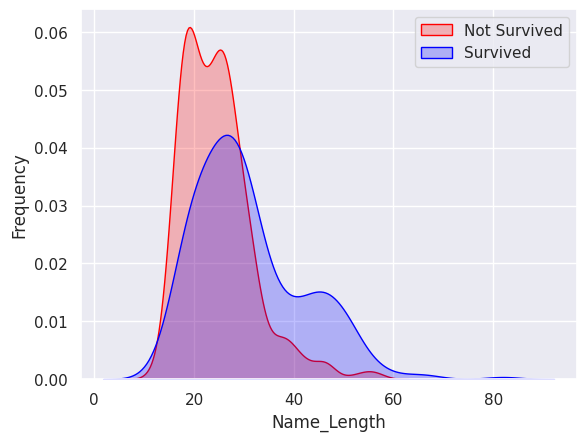

In [89]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']== 0) & (train_df['Name_Length'].notnull())],color = 'Red', fill = True)

g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']== 1) & (train_df['Name_Length'].notnull())],ax = g, color = 'Blue', fill = True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

## Feature Encoding the categorical column

In [55]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [56]:
train_df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [57]:
train_df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)


In [58]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Family_Size_Grouped,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,2,Small,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2,Small,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,Alone,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,2,Small,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,Alone,Mr


Seperating features and target

In [59]:
X = train_df.drop(columns = ['PassengerId','Name','Ticket','Survived','Family_Size_Grouped','Title'],axis = 1)
Y = train_df['Survived']

Splitting the data into training data and testing data

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(891, 8) (712, 8) (179, 8)


## Feature Scaling

In [62]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Model Training

## Model 1 . Logistic Regression

In [63]:
model_1 = LogisticRegression()
#training the logistic regression model with training data
model_1.fit(X_train_scaled,Y_train)

LogisticRegression()

In [64]:
X_train_prediction = model_1.predict(X_train_scaled)

In [65]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [66]:
training_data_accuracy = round(accuracy_score(Y_train, X_train_prediction)*100,2)

In [67]:
print('Accuracy of Logistic Regression Model is: ',training_data_accuracy, '%')

Accuracy of Logistic Regression Model is:  80.9 %


In [68]:
#accuracy on test data
X_test_prediction = model_1.predict(X_test_scaled)

In [69]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [70]:
testing_data_accuracy = round(accuracy_score(Y_test, X_test_prediction)*100,2)

In [71]:
print('Accuracy of Logistic Regression Model is: ',testing_data_accuracy, '%')

Accuracy of Logistic Regression Model is:  78.21 %


## KNN Model

In [72]:
model_2 = KNeighborsClassifier()
#training the KNN model with training data
model_2.fit(X_train_scaled,Y_train)


KNeighborsClassifier()

In [73]:
X_train_prediction = model_2.predict(X_train_scaled)

In [74]:
training_data_accuracy = round(accuracy_score(Y_train, X_train_prediction)*100,2)

In [75]:
print('Accuracy of KNN Model is: ',training_data_accuracy, '%')

Accuracy of KNN Model is:  86.1 %


Model

In [76]:

models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "SVM":LinearSVC()}

In [77]:
def fit_and_score(models,X_train_scaled,X_test_scaled,Y_train,Y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """

    #np.random.seed(42)

    model_scores={}

    for name, model in models.items():
        model.fit(X_train_scaled,Y_train)
        model_scores[name] = model.score(X_test_scaled,Y_test)

    return model_scores

In [78]:
model_scores = fit_and_score(models = models,
                             X_train_scaled = X_train_scaled,
                             X_test_scaled = X_test_scaled,
                             Y_train = Y_train,
                             Y_test = Y_test)
print(" The scores of the models are :", model_scores )


 The scores of the models are : {'KNN': 0.7821229050279329, 'Logistic Regression': 0.7821229050279329, 'Random Forest': 0.7988826815642458, 'SVM': 0.7653631284916201}


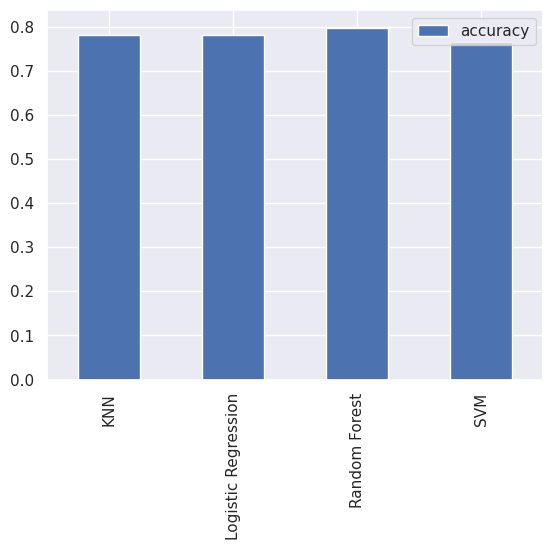

In [79]:

model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();